In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Start Spark session
spark = SparkSession.builder.appName("NYC_Taxi_Data_Analysis").getOrCreate()

# Load the parquet file into a DataFrame
df = spark.read.parquet("../data/your-file.parquet", header=True, inferSchema=True)

# Show first few rows
df.show(5)

# Dataframe schema
df.printSchema()


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       1| 2019-01-01 00:46:40|  2019-01-01 00:53:20|            1.0|          1.5|       1.0|                 N|         151|         239|           1|        7.0|  0.5|    0.5|      1.6

In [2]:
# Remove rows with null values
df_clean = df.dropna()

# Filter out negative distances and fares
df_clean = df_clean.filter((df_clean.trip_distance > 0) & (df_clean.fare_amount > 0))

# Show cleaned data
df_clean.show(5)


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+---------

In [3]:
# Average trip distance and fare amount
df.select('trip_distance', 'fare_amount').describe().show()

# Group by pickup location and aggregate total trips
pickup_analysis = df.groupBy('PULocationID').count().orderBy('count', ascending=False)
pickup_analysis.show(5)


+-------+------------------+-----------------+
|summary|     trip_distance|      fare_amount|
+-------+------------------+-----------------+
|  count|           7696617|          7696617|
|   mean|2.8301461681153532|12.52967677747685|
| stddev| 3.774548394256295|261.5897471783846|
|    min|               0.0|           -362.0|
|    max|             831.8|        623259.86|
+-------+------------------+-----------------+

+------------+------+
|PULocationID| count|
+------------+------+
|         237|332785|
|         236|323295|
|         161|312855|
|         162|277477|
|         230|264134|
+------------+------+
only showing top 5 rows



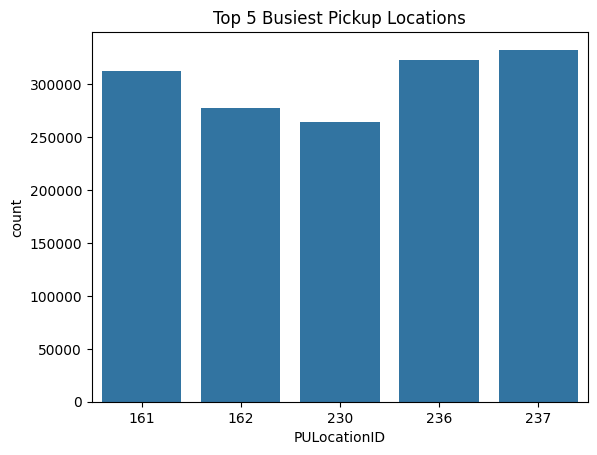

In [4]:
# Convert to Pandas DataFrame for visualizations
pickup_pd = pickup_analysis.toPandas()

# Plot top 5 pickup locations
sns.barplot(x='PULocationID', y='count', data=pickup_pd.head(5))
plt.title('Top 5 Busiest Pickup Locations')
plt.show()
